### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns # Visualization
from IPython.display import display, HTML
from sklearn import metrics
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split

from keras.models import Sequential 
from keras.layers import Dense, Activation 
from keras.layers.normalization import BatchNormalization
from keras import initializers
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.embeddings import Embedding
from keras.layers import Dense, Input, Embedding, Lambda, Dropout, Activation, Reshape, GlobalAveragePooling1D, merge, Flatten, Bidirectional, CuDNNGRU, add, Conv1D, GlobalMaxPooling1D,MaxPooling1D
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from prettytable import PrettyTable

Using TensorFlow backend.


In [2]:
os.chdir('G:/interview-bit-ZS')

In [3]:
# Reading the data 
data=pd.read_csv('data.csv')

In [4]:
# Printing first five rows of the data
data.head()

,Unnamed: 0,match_event_id,location_x,location_y,remaining_min,power_of_shot,knockout_match,game_season,remaining_sec,distance_of_shot,...,lat/lng,type_of_shot,type_of_combined_shot,match_id,team_id,remaining_min.1,power_of_shot.1,knockout_match.1,remaining_sec.1,distance_of_shot.1
0,0,10.0,167.0,72.0,10.0,1.0,0.0,2000-01,27.0,38.0,...,"45.539131, -122.651648",shot - 30,NaN,20000012,1610612747,10.00,1.0,50.608,54.2000,38.0
1,1,12.0,-157.0,0.0,10.0,1.0,0.0,2000-01,22.0,35.0,...,"45.539131, -122.651648",shot - 45,NaN,20000012,1610612747,10.00,1.0,28.800,22.0000,35.0
2,2,35.0,-101.0,135.0,7.0,1.0,0.0,2000-01,45.0,36.0,...,"45.539131, -122.651648",shot - 25,NaN,20000012,1610612747,92.64,1.0,0.000,63.7216,54.4
3,3,43.0,138.0,175.0,6.0,1.0,0.0,2000-01,52.0,42.0,...,"45.539131, -122.651648",NaN,shot - 3,20000012,1610612747,NaN,1.0,122.608,52.0000,42.0
4,4,155.0,0.0,0.0,NaN,2.0,0.0,2000-01,19.0,20.0,...,"45.539131, -122.651648",NaN,shot - 1,20000012,1610612747,42.64,2.0,0.000,19.0000,20.0


In [5]:
data.drop(['Unnamed: 0'],axis=1,inplace=True)

In [6]:
# telling no of rows and columns in a dataset
data.shape

(30697, 27)

In [7]:
# COlumns of a dataset
data.columns

Index(['match_event_id', 'location_x', 'location_y', 'remaining_min',
       'power_of_shot', 'knockout_match', 'game_season', 'remaining_sec',
       'distance_of_shot', 'is_goal', 'area_of_shot', 'shot_basics',
       'range_of_shot', 'team_name', 'date_of_game', 'home/away',
       'shot_id_number', 'lat/lng', 'type_of_shot', 'type_of_combined_shot',
       'match_id', 'team_id', 'remaining_min.1', 'power_of_shot.1',
       'knockout_match.1', 'remaining_sec.1', 'distance_of_shot.1'],
      dtype='object')

In [8]:
# target variable count
data.is_goal.value_counts()

0.0    13550
1.0    10879
Name: is_goal, dtype: int64

## 1. Exploratory Data Analysis

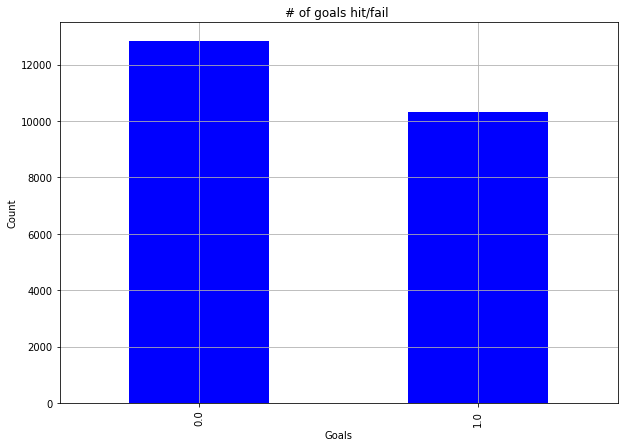

In [9]:
# bar plot to visualise # of goals hit/fail
ax = data.groupby('is_goal').count()['shot_id_number'].plot(
kind='bar',
color='blue',
grid=True,
figsize=(10, 7),
title='# of goals hit/fail '
)
ax.set_xlabel('Goals')
ax.set_ylabel('Count')
plt.show()

In [10]:
# Percentage of goals hit/fail
data.groupby('is_goal').count()['shot_id_number']/data.shape[0]

is_goal
0.0    0.418673
1.0    0.336417
Name: shot_id_number, dtype: float64

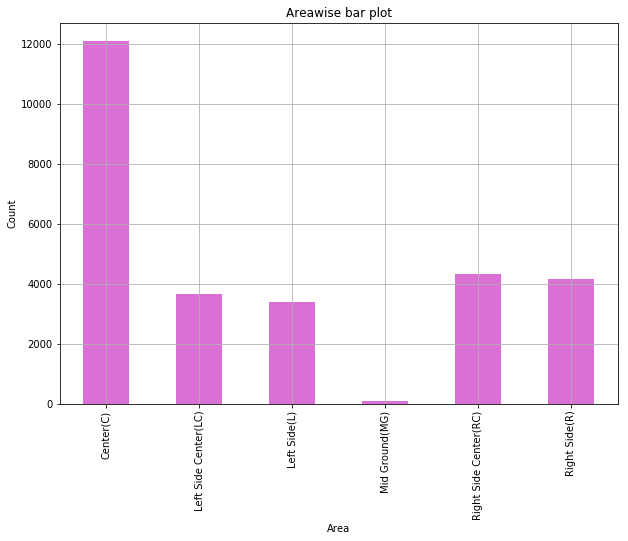

In [11]:
# Bar plot to show count of area of shot
# plot shows the most prefered area in which ronaldo likes to play is Center
ax = data.groupby('area_of_shot').count()['shot_id_number'].plot(
kind='bar',
color='orchid',
grid=True,
figsize=(10, 7),
title='Areawise bar plot'
)
ax.set_xlabel('Area')
ax.set_ylabel('Count')
plt.show()

In [12]:
# percentage of area of shot
data.groupby('area_of_shot').count()['shot_id_number']/data.shape[0]

area_of_shot
Center(C)                0.394273
Left Side Center(LC)     0.118806
Left Side(L)             0.110532
Mid Ground(MG)           0.002411
Right Side Center(RC)    0.141121
Right Side(R)            0.135681
Name: shot_id_number, dtype: float64

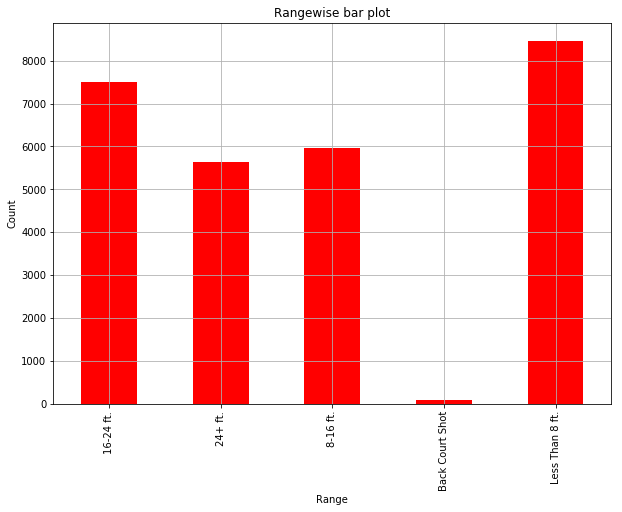

In [13]:
# Bar plot to show count of range of shot
# plot shows the most prefered range of shot for ronaldo is less than 8 ft followed by 16.24 ft
ax = data.groupby('range_of_shot').count()['shot_id_number'].plot(
kind='bar',
color='red',
grid=True,
figsize=(10, 7),
title='Rangewise bar plot'
)
ax.set_xlabel('Range')
ax.set_ylabel('Count')
plt.show()

In [14]:
data.groupby('range_of_shot').count()['shot_id_number']/data.shape[0]

range_of_shot
16-24 ft.          0.244617
24+ ft.            0.183699
8-16 ft.           0.194482
Back Court Shot    0.002411
Less Than 8 ft.    0.275564
Name: shot_id_number, dtype: float64

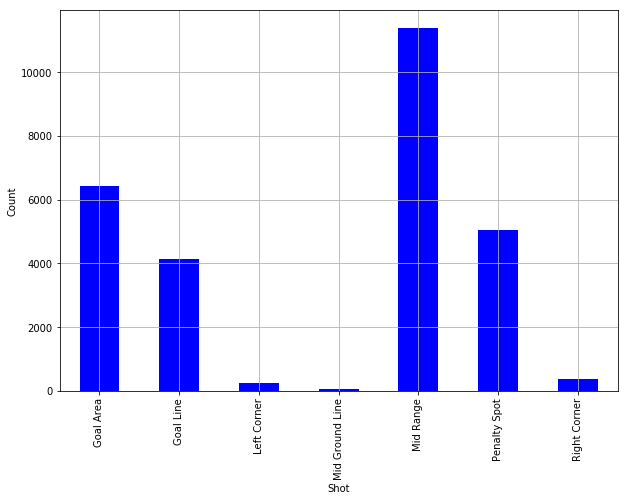

In [15]:
# Bar plot to show count of shots
# plot shows the most prefered shot for ronaldo is Mid Range followed by Goal Area
ax = data.groupby('shot_basics').count()['shot_id_number'].plot(
kind='bar',
color='blue',
grid=True,
figsize=(10, 7),
title=''
)
ax.set_xlabel('Shot')
ax.set_ylabel('Count')
plt.show()

In [16]:
data.groupby('shot_basics').count()['shot_id_number']/data.shape[0]

shot_basics
Goal Area          0.209206
Goal Line          0.134345
Left Corner        0.008340
Mid Ground Line    0.001955
Mid Range          0.370720
Penalty Spot       0.164283
Right Corner       0.011565
Name: shot_id_number, dtype: float64

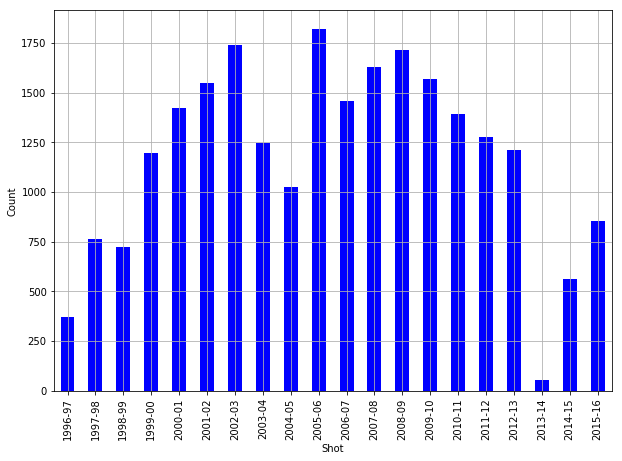

In [17]:
# Bar plot to show count of games in each year
# plot shows the most games ronaldo plays is in year 2005
ax = data.groupby('game_season').count()['shot_id_number'].plot(
kind='bar',
color='blue',
grid=True,
figsize=(10, 7),
title=''
)
ax.set_xlabel('Shot')
ax.set_ylabel('Count')
plt.show()

In [18]:
data.groupby('game_season').count()['shot_id_number']/data.shape[0]

game_season
1996-97    0.012053
1997-98    0.024888
1998-99    0.023553
1999-00    0.038929
2000-01    0.046389
2001-02    0.050396
2002-03    0.056716
2003-04    0.040623
2004-05    0.033358
2005-06    0.059354
2006-07    0.047496
2007-08    0.053100
2008-09    0.055803
2009-10    0.051015
2010-11    0.045281
2011-12    0.041535
2012-13    0.039515
2013-14    0.001857
2014-15    0.018373
2015-16    0.027788
Name: shot_id_number, dtype: float64

In [19]:
by_area_range = data.loc[
data['is_goal'] == 1.0
].groupby([
'area_of_shot', 'range_of_shot'
]).count()['shot_id_number'] / data.groupby('area_of_shot').count()['shot_id_number']


In [20]:
by_area_range = by_area_range.unstack().fillna(0)
by_area_range


range_of_shot,16-24 ft.,24+ ft.,8-16 ft.,Back Court Shot,Less Than 8 ft.
area_of_shot,,,,,
Center(C),0.027183,0.020739,0.049988,0.000000,0.300421
Left Side Center(LC),0.144228,0.127502,0.000000,0.000000,0.000000
Left Side(L),0.092249,0.020336,0.185971,0.000000,0.000000
Mid Ground(MG),0.000000,0.000000,0.000000,0.013514,0.000000
Right Side Center(RC),0.161127,0.126731,0.000000,0.000000,0.000000
Right Side(R),0.094118,0.023049,0.183914,0.000000,0.000000


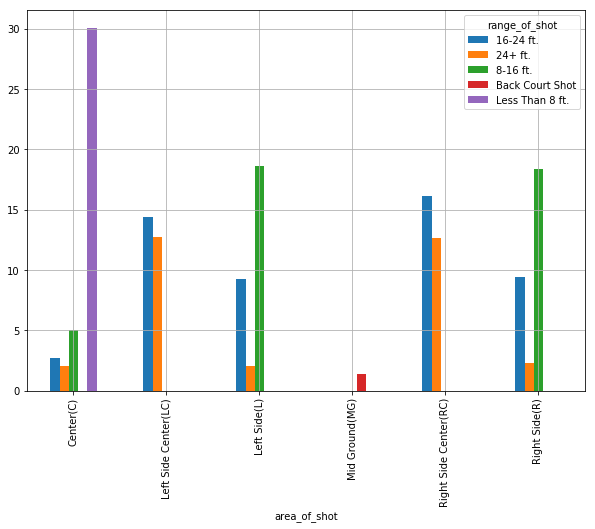

In [21]:
# plot to show goal success rate by area of shot and range of shot
ax = (by_area_range*100.0).plot(
kind='bar',
figsize=(10, 7),
grid=True
)
ax.set_ylabel('')
plt.show()

In [22]:
data.describe()

,match_event_id,location_x,location_y,remaining_min,power_of_shot,knockout_match,remaining_sec,distance_of_shot,is_goal,shot_id_number,match_id,team_id,remaining_min.1,power_of_shot.1,knockout_match.1,remaining_sec.1,distance_of_shot.1
count,29134.000000,29236.000000,29157.000000,29135.000000,29211.000000,29180.000000,29103.000000,29130.000000,24429.000000,29134.000000,3.069700e+04,3.069700e+04,29162.000000,29158.000000,29204.000000,29158.000000,29129.000000
mean,249.576028,7.383876,91.126933,4.883233,2.519359,0.145956,28.329382,33.448884,0.445331,15368.581039,2.476407e+07,1.610613e+09,18.204615,15.994109,16.599402,39.027303,38.801852
std,150.186019,110.263049,87.676395,3.452533,1.153976,0.353068,17.470663,9.369656,0.497013,8866.520772,7.755175e+06,0.000000e+00,29.416973,29.676815,35.172016,29.835284,18.787711
min,2.000000,-250.000000,-44.000000,0.000000,1.000000,0.000000,0.000000,20.000000,0.000000,1.000000,2.000001e+07,1.610613e+09,0.000000,1.000000,0.000000,0.000000,9.400000
25%,111.000000,-68.000000,4.000000,2.000000,1.000000,0.000000,13.000000,25.000000,0.000000,7693.250000,2.050008e+07,1.610613e+09,3.000000,2.000000,0.000000,17.000000,26.000000
50%,254.000000,0.000000,74.000000,5.000000,3.000000,0.000000,28.000000,35.000000,0.000000,15378.500000,2.090035e+07,1.610613e+09,6.000000,3.000000,0.000000,35.000000,36.000000
75%,369.000000,95.000000,160.000000,8.000000,3.000000,0.000000,43.000000,41.000000,1.000000,23055.750000,2.960047e+07,1.610613e+09,11.000000,4.000000,1.000000,52.000000,44.000000
max,659.000000,248.000000,791.000000,11.000000,7.000000,1.000000,59.000000,99.000000,1.000000,30697.000000,4.990009e+07,1.610613e+09,128.761600,118.360000,141.352320,144.785600,115.728000


In [23]:
# printing the information about each feature
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30697 entries, 0 to 30696
Data columns (total 27 columns):
match_event_id           29134 non-null float64
location_x               29236 non-null float64
location_y               29157 non-null float64
remaining_min            29135 non-null float64
power_of_shot            29211 non-null float64
knockout_match           29180 non-null float64
game_season              24835 non-null object
remaining_sec            29103 non-null float64
distance_of_shot         29130 non-null float64
is_goal                  24429 non-null float64
area_of_shot             29195 non-null object
shot_basics              29122 non-null object
range_of_shot            29133 non-null object
team_name                29162 non-null object
date_of_game             29147 non-null object
home/away                29200 non-null object
shot_id_number           29134 non-null float64
lat/lng                  29132 non-null object
type_of_shot             15417 non-

In [24]:
data1=data.drop('team_id',axis=1)

Text(0.5, 1.0, 'Heatmap of dataset')

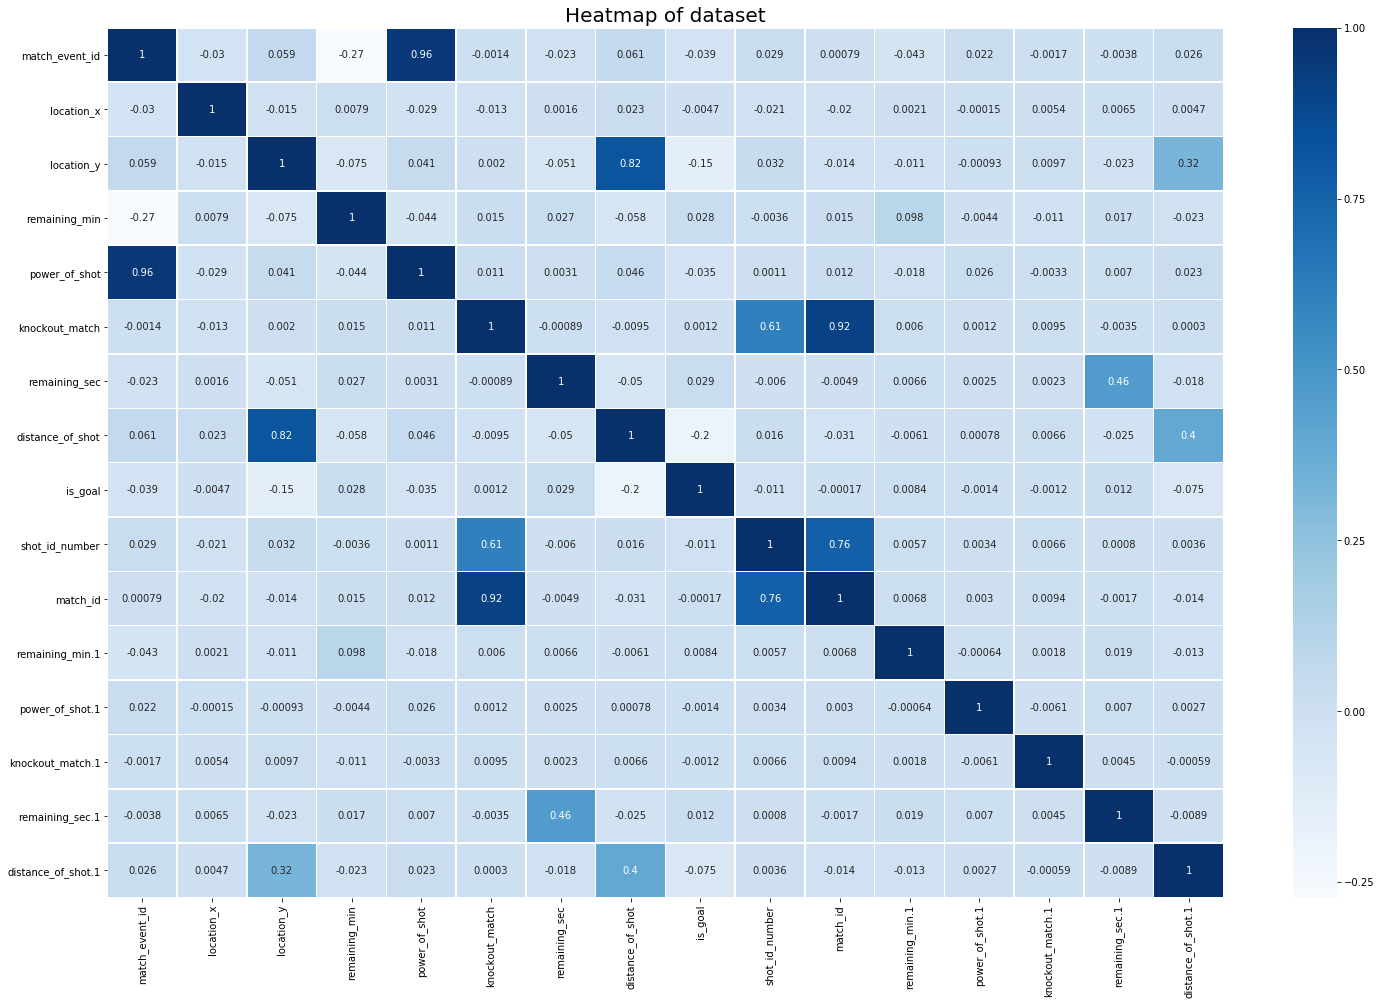

In [25]:
# Heatmap to shows correlation among features
# Below plot shows features match_event_id and match_id are co-related
plt.rcParams['figure.figsize']=(25,16)
hm=sns.heatmap(data1.corr(), annot = True, linewidths=.5, cmap='Blues')
hm.set_title(label='Heatmap of dataset', fontsize=20)

In [26]:
# dropping the correlated features
data.drop(['match_event_id','match_id','team_id'],axis=1,inplace=True)

In [27]:
# no of rows and columns after feature removing co-related features
data.shape

(30697, 24)

In [28]:
data['is_goal'].isnull().sum()

6268

In [29]:
# dropping the rows for which is_goal is null
data.drop(data[data['is_goal'].isnull()].index, inplace = True) 

In [30]:
data.shape

(24429, 24)

In [31]:
shot_id=data['shot_id_number']

In [32]:
data.drop('shot_id_number',axis=1,inplace=True)
data.columns

Index(['location_x', 'location_y', 'remaining_min', 'power_of_shot',
       'knockout_match', 'game_season', 'remaining_sec', 'distance_of_shot',
       'is_goal', 'area_of_shot', 'shot_basics', 'range_of_shot', 'team_name',
       'date_of_game', 'home/away', 'lat/lng', 'type_of_shot',
       'type_of_combined_shot', 'remaining_min.1', 'power_of_shot.1',
       'knockout_match.1', 'remaining_sec.1', 'distance_of_shot.1'],
      dtype='object')

### Data cleaning

In [33]:
# changing the datatype of features
DataVars = data.columns
data_types = {Var: data[Var].dtype for Var in DataVars}

In [34]:
data_types

{'location_x': dtype('float64'),
 'location_y': dtype('float64'),
 'remaining_min': dtype('float64'),
 'power_of_shot': dtype('float64'),
 'knockout_match': dtype('float64'),
 'game_season': dtype('O'),
 'remaining_sec': dtype('float64'),
 'distance_of_shot': dtype('float64'),
 'is_goal': dtype('float64'),
 'area_of_shot': dtype('O'),
 'shot_basics': dtype('O'),
 'range_of_shot': dtype('O'),
 'team_name': dtype('O'),
 'date_of_game': dtype('O'),
 'home/away': dtype('O'),
 'lat/lng': dtype('O'),
 'type_of_shot': dtype('O'),
 'type_of_combined_shot': dtype('O'),
 'remaining_min.1': dtype('float64'),
 'power_of_shot.1': dtype('float64'),
 'knockout_match.1': dtype('float64'),
 'remaining_sec.1': dtype('float64'),
 'distance_of_shot.1': dtype('float64')}

In [35]:
# Converting the object type features into category
for Var in DataVars:
    if data_types[Var] == int:
        x = data[Var].astype(float)
        data.loc[:, Var] = x
        data_types[Var] = x.dtype
    elif data_types[Var] != float:
        x = data[Var].astype('category')
        data.loc[:, Var] = x
        data_types[Var] = x.dtype

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24429 entries, 1 to 30696
Data columns (total 23 columns):
location_x               23273 non-null float64
location_y               23184 non-null float64
remaining_min            23185 non-null float64
power_of_shot            23229 non-null float64
knockout_match           23217 non-null float64
game_season              19797 non-null category
remaining_sec            23179 non-null float64
distance_of_shot         23172 non-null float64
is_goal                  24429 non-null float64
area_of_shot             23247 non-null category
shot_basics              23146 non-null category
range_of_shot            23181 non-null category
team_name                23217 non-null category
date_of_game             23192 non-null category
home/away                23215 non-null category
lat/lng                  23182 non-null category
type_of_shot             12293 non-null category
type_of_combined_shot    12136 non-null category
remaining_min.1  

In [37]:
# storing all the float datatype features
float_DataVars = [Var for Var in DataVars if data_types[Var] == float]

In [38]:
# Filling the missing values of float features with mean
float_x_means = data.mean()

for Var in float_DataVars:
    x = data[Var]
    meancol=data[Var].median()
    isThereMissing = x.isnull()
    if isThereMissing.sum() > 0:
        data.loc[isThereMissing.tolist(), Var] = meancol

In [39]:
# storing all the categpry features
DataVars = data.columns

categorical_DataVars = [Var for Var in DataVars if data_types[Var] != float]

In [40]:
categorical_DataVars

['game_season',
 'area_of_shot',
 'shot_basics',
 'range_of_shot',
 'team_name',
 'date_of_game',
 'home/away',
 'lat/lng',
 'type_of_shot',
 'type_of_combined_shot']

In [41]:
categorical_levels = data[categorical_DataVars].apply(lambda col: len(col.cat.categories))
categorical_levels 

game_season                20
area_of_shot                6
shot_basics                 7
range_of_shot               5
team_name                   1
date_of_game             1557
home/away                  74
lat/lng                    38
type_of_shot               57
type_of_combined_shot       6
dtype: int64

In [42]:
categorical_x_var_names = categorical_levels[categorical_levels > 1].index
categorical_x_var_names

Index(['game_season', 'area_of_shot', 'shot_basics', 'range_of_shot',
       'date_of_game', 'home/away', 'lat/lng', 'type_of_shot',
       'type_of_combined_shot'],
      dtype='object')

In [43]:
def replaceInfrequentLevels(data, val=0.015):
    collapsed_categories = {}
    for categorical_x_var_name in categorical_x_var_names:
        x = data[categorical_x_var_name].copy()
        for category in x.cat.categories:
            matching_rows_yesno = x == category
            if matching_rows_yesno.sum() < val * data.shape[0]:
                if categorical_x_var_name in collapsed_categories:
                    collapsed_categories[categorical_x_var_name].append(category)
                else:
                    collapsed_categories[categorical_x_var_name] = [category]
                if 'OTHER' not in data[categorical_x_var_name].cat.categories:
                    data[categorical_x_var_name].cat.add_categories('OTHER', inplace=True)
                data.loc[matching_rows_yesno, categorical_x_var_name] = 'OTHER'
                data[categorical_x_var_name].cat.remove_categories(category, inplace=True)
    return data  

In [44]:
data = replaceInfrequentLevels(data)

In [45]:
categorical_x_nb_levels = data[categorical_x_var_names].apply(lambda col: len(col.cat.categories))
print("Number of unique values within categorical features after preprocessing:")
categorical_x_nb_levels

Number of unique values within categorical features after preprocessing:


game_season              19
area_of_shot              6
shot_basics               5
range_of_shot             5
date_of_game              1
home/away                26
lat/lng                  15
type_of_shot              7
type_of_combined_shot     4
dtype: int64

In [46]:
print(data[categorical_x_var_names].isnull().sum()/len(data))

game_season              0.189611
area_of_shot             0.048385
shot_basics              0.052520
range_of_shot            0.051087
date_of_game             0.050637
home/away                0.049695
lat/lng                  0.051046
type_of_shot             0.496787
type_of_combined_shot    0.503213
dtype: float64


In [47]:
for categorical_var_name in categorical_x_var_names:
    data[categorical_var_name].cat.add_categories("unknown_"+categorical_var_name, inplace=True)
    data[categorical_var_name].fillna("unknown_"+categorical_var_name, inplace=True)

In [48]:
print("Percentage of missing values per Categorical feature after preprocessing:")
print(data[categorical_x_var_names].isnull().sum()/len(data))

Percentage of missing values per Categorical feature after preprocessing:
game_season              0.0
area_of_shot             0.0
shot_basics              0.0
range_of_shot            0.0
date_of_game             0.0
home/away                0.0
lat/lng                  0.0
type_of_shot             0.0
type_of_combined_shot    0.0
dtype: float64


In [49]:
lst=[]
for i in data.columns:
    if data[i].dtypes!=float:
        lst.append(i)
lst

['game_season',
 'area_of_shot',
 'shot_basics',
 'range_of_shot',
 'team_name',
 'date_of_game',
 'home/away',
 'lat/lng',
 'type_of_shot',
 'type_of_combined_shot']

In [50]:
# performing one hot encoding
data_1 = pd.get_dummies(data, columns=['game_season',
 'area_of_shot',
 'shot_basics',
 'range_of_shot',
 'team_name',
 'date_of_game',
 'home/away',
 'lat/lng',
 'type_of_shot',
 'type_of_combined_shot'])

In [51]:
data_1.head()

,location_x,location_y,remaining_min,power_of_shot,knockout_match,remaining_sec,distance_of_shot,is_goal,remaining_min.1,power_of_shot.1,...,type_of_shot_shot - 39,type_of_shot_shot - 4,type_of_shot_shot - 44,type_of_shot_OTHER,type_of_shot_unknown_type_of_shot,type_of_combined_shot_shot - 1,type_of_combined_shot_shot - 3,type_of_combined_shot_shot - 4,type_of_combined_shot_OTHER,type_of_combined_shot_unknown_type_of_combined_shot
1,-157.0,0.0,10.0,1.0,0.0,22.0,35.0,0.0,10.00,1.0,...,0,0,0,1,0,0,0,0,0,1
2,-101.0,135.0,7.0,1.0,0.0,45.0,36.0,1.0,92.64,1.0,...,0,0,0,1,0,0,0,0,0,1
3,138.0,175.0,6.0,1.0,0.0,52.0,42.0,0.0,6.00,1.0,...,0,0,0,0,1,0,1,0,0,0
4,0.0,0.0,5.0,2.0,0.0,19.0,20.0,1.0,42.64,2.0,...,0,0,0,0,1,1,0,0,0,0
5,-145.0,-11.0,9.0,3.0,0.0,32.0,34.0,0.0,9.00,3.0,...,0,0,0,1,0,0,0,0,0,1


In [52]:
data_1['shot_id_number']=shot_id

In [53]:
data_1.drop(data_1[data_1['shot_id_number'].isnull()].index, inplace = True) 

In [54]:
data_2=data_1.copy()

In [55]:
y=data_1['is_goal']
X=data_1.drop('is_goal',axis=1)

In [56]:
X.head()

,location_x,location_y,remaining_min,power_of_shot,knockout_match,remaining_sec,distance_of_shot,remaining_min.1,power_of_shot.1,knockout_match.1,...,type_of_shot_shot - 4,type_of_shot_shot - 44,type_of_shot_OTHER,type_of_shot_unknown_type_of_shot,type_of_combined_shot_shot - 1,type_of_combined_shot_shot - 3,type_of_combined_shot_shot - 4,type_of_combined_shot_OTHER,type_of_combined_shot_unknown_type_of_combined_shot,shot_id_number
1,-157.0,0.0,10.0,1.0,0.0,22.0,35.0,10.00,1.0,28.800,...,0,0,1,0,0,0,0,0,1,2.0
2,-101.0,135.0,7.0,1.0,0.0,45.0,36.0,92.64,1.0,0.000,...,0,0,1,0,0,0,0,0,1,3.0
3,138.0,175.0,6.0,1.0,0.0,52.0,42.0,6.00,1.0,122.608,...,0,0,0,1,0,1,0,0,0,4.0
4,0.0,0.0,5.0,2.0,0.0,19.0,20.0,42.64,2.0,0.000,...,0,0,0,1,1,0,0,0,0,5.0
5,-145.0,-11.0,9.0,3.0,0.0,32.0,34.0,9.00,3.0,0.000,...,0,0,1,0,0,0,0,0,1,6.0


In [57]:
# train test split with 80% train and 20% test
X_train,X_test, y_train, y_test = train_test_split(X,y, stratify=y, test_size=0.2, random_state=42)

In [58]:
shot_id_train=X_train['shot_id_number']
X_train.drop('shot_id_number',axis=1,inplace=True)
shot_id_test=X_test['shot_id_number']
X_test.drop('shot_id_number',axis=1,inplace=True)

C:\Users\abc\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [59]:
# Standarize the features
def standardize(train, test):


    mean = np.mean(train, axis=0)
    std = np.std(train, axis=0)+0.000001

    X_train = (train - mean) / std
    X_test = (test - mean) /std
    return X_train, X_test

In [60]:
X_train, X_test=standardize(X_train, X_test)

In [61]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((18543, 110), (4636, 110), (18543,), (4636,))

In [62]:
X_train.head()

,location_x,location_y,remaining_min,power_of_shot,knockout_match,remaining_sec,distance_of_shot,remaining_min.1,power_of_shot.1,knockout_match.1,...,type_of_shot_shot - 39,type_of_shot_shot - 4,type_of_shot_shot - 44,type_of_shot_OTHER,type_of_shot_unknown_type_of_shot,type_of_combined_shot_shot - 1,type_of_combined_shot_shot - 3,type_of_combined_shot_shot - 4,type_of_combined_shot_OTHER,type_of_combined_shot_unknown_type_of_combined_shot
5197,0.344219,-1.119875,0.032621,-1.367008,-0.400755,1.165955,-1.047827,-0.434935,-0.494247,-0.456633,...,-0.218913,-0.191505,-0.142293,-0.681173,1.009154,-0.139104,1.278697,-0.311694,-0.092109,-1.009154
15650,1.065385,-1.038443,-0.856491,-1.367008,-0.400755,1.459216,-0.173061,-0.538852,-0.494247,-0.456633,...,-0.218913,-0.191505,-0.142293,-0.681173,-0.990925,-0.139104,-0.782043,-0.311694,-0.092109,0.990925
250,1.444459,-0.968644,0.032621,0.405424,-0.400755,-0.476310,0.264321,-0.400297,-0.425515,-0.456633,...,-0.218913,-0.191505,-0.142293,-0.681173,1.009154,-0.139104,1.278697,-0.311694,-0.092109,-1.009154
20173,-0.007118,-0.526583,-1.152861,0.405424,-0.400755,1.341912,-1.047827,3.258940,-0.425515,2.617093,...,-0.218913,-0.191505,-0.142293,-0.681173,-0.990925,-0.139104,-0.782043,-0.311694,-0.092109,0.990925
28535,-1.930225,-0.503317,-1.152861,1.291640,2.495273,-1.473399,0.701704,-0.573490,-0.391148,-0.427527,...,-0.218913,-0.191505,-0.142293,-0.681173,1.009154,-0.139104,1.278697,-0.311694,-0.092109,-1.009154


In [74]:
xgb=XGBClassifier(n_estimators=50, max_depth=9)
xgb.fit(X_train,y_train)
pred=xgb.predict(X_test)

In [75]:
acc=metrics.accuracy_score(y_test,pred)
auc=metrics.roc_auc_score(y_test,pred)
mae=metrics.mean_absolute_error(y_test, pred)
print("Accuracy on test dataset ",acc)
print("AUC on test dataset ",auc)
print("Mean absolute error on test dataset ",mae)

Accuracy on test dataset  0.6182053494391717
AUC on test dataset  0.5902042054089994
Mean absolute error on test dataset  0.3817946505608283


In [76]:
from sklearn.linear_model import LogisticRegression
tuned_parameters = [{'C': [10**-4, 10**-2, 10**0, 10**2, 10**4]}]
model = GridSearchCV(LogisticRegression(), tuned_parameters, scoring = 'neg_mean_absolute_error', cv=5)
model.fit(X_train, y_train)

print(model.best_estimator_)
print(model.score(X_test, y_test))

C:\Users\abc\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\abc\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\abc\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\abc\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\abc\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warnin

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)
-0.3854616048317515


In [77]:
clf = LogisticRegression(C=0.01, penalty='l2')
clf.fit(X_train, y_train)
pred = clf.predict(X_test)

C:\Users\abc\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [78]:

acc=metrics.accuracy_score(y_test,pred)
auc=metrics.roc_auc_score(y_test,pred)
mae=metrics.mean_absolute_error(y_test, pred)
print("Accuracy on test dataset ",acc)
print("AUC on test dataset ",auc)
print("Mean absolute error on test dataset ",mae)

Accuracy on test dataset  0.6145383951682485
AUC on test dataset  0.5872793299824924
Mean absolute error on test dataset  0.3854616048317515


In [79]:
# performing hyperparameter tuning of max_depth and n_estimators features using grid search and by using random forest classifier 
random_classifier = RandomForestClassifier()

parameters = { 'max_depth':np.arange(5,10),'n_estimators':list(range(50,301,25))}

random_grid = GridSearchCV(random_classifier, parameters, cv = 3,scoring = 'neg_mean_absolute_error')

random_grid.fit(X_train, y_train)

print("Best HyperParameter: ",random_grid.best_params_)

Best HyperParameter:  {'max_depth': 9, 'n_estimators': 100}


In [80]:
rf_model = RandomForestClassifier(
    n_estimators=100,
    #criterion='entropy',
    max_depth=9,   # expand until all leaves are pure or contain < MIN_SAMPLES_SPLIT samples
    #min_samples_split=100,
    #min_samples_leaf=50,
    #min_weight_fraction_leaf=0.0,
    max_features=None,   # number of features to consider when looking for the best split; None: max_features=n_features
    max_leaf_nodes=None,   # None: unlimited number of leaf nodes
    bootstrap=True,
    oob_score=True,   # estimate Out-of-Bag Cross Entropy
    n_jobs=-1,   # paralellize over all CPU cores but 2
    class_weight='balanced',    # our classes are skewed, but but too skewed
    random_state=42,
    verbose=0,
    warm_start=False)

rf_model.fit(X=X_train, y=y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=9, max_features=None,
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=-1, oob_score=True, random_state=42,
            verbose=0, warm_start=False)

In [81]:
rf_pred_probs=rf_model.predict(X_train)
acc=metrics.accuracy_score(y_train,rf_pred_probs)
auc=metrics.roc_auc_score(y_train,rf_pred_probs)
mae=metrics.mean_absolute_error(y_train,rf_pred_probs)
print("Accuracy on train dataset ",acc)
print("AUC on train dataset ",auc)
print("Mean absolute error on train dataset ",auc)

Accuracy on train dataset  0.6700641751604379
AUC on train dataset  0.6431684163036114
Mean absolute error on train dataset  0.6431684163036114


In [82]:
rf_pred_probs=rf_model.predict(X_test)

acc=metrics.accuracy_score(y_test,rf_pred_probs)
auc=metrics.roc_auc_score(y_test,rf_pred_probs)
mae=metrics.mean_absolute_error(y_test,rf_pred_probs)
print("Accuracy on test dataset ",acc)
print("AUC on test dataset ",auc)
print("Mean absolute error on test dataset ",mae)

Accuracy on test dataset  0.6220880069025022
AUC on test dataset  0.594514905026544
Mean absolute error on test dataset  0.37791199309749784


In [83]:
feature_importances = pd.DataFrame(rf_model.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)
feature_importances

,importance
distance_of_shot,0.260416
type_of_shot_shot - 39,0.066186
location_x,0.049474
remaining_sec.1,0.048887
type_of_shot_shot - 44,0.048073
type_of_combined_shot_shot - 4,0.044513
remaining_sec,0.041535
location_y,0.039143
remaining_min.1,0.035777
distance_of_shot.1,0.035741


In [84]:
# feature importance
# finding the top 100 features
feature_importances = pd.DataFrame(rf_model.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)
feature_importances[:100].index

Index(['distance_of_shot', 'type_of_shot_shot - 39', 'location_x',
       'remaining_sec.1', 'type_of_shot_shot - 44',
       'type_of_combined_shot_shot - 4', 'remaining_sec', 'location_y',
       'remaining_min.1', 'distance_of_shot.1', 'shot_basics_Goal Area',
       'remaining_min', 'power_of_shot.1', 'type_of_combined_shot_OTHER',
       'knockout_match.1', 'power_of_shot', 'lat/lng_42.982923, -71.446094',
       'type_of_combined_shot_shot - 1', 'type_of_shot_shot - 38',
       'type_of_shot_shot - 15', 'game_season_2008-09', 'game_season_2007-08',
       'lat/lng_OTHER', 'home/away_OTHER', 'game_season_2005-06',
       'type_of_shot_shot - 36', 'lat/lng_unknown_lat/lng', 'knockout_match',
       'game_season_unknown_game_season', 'home/away_unknown_home/away',
       'game_season_2001-02', 'game_season_2010-11', 'game_season_1998-99',
       'game_season_2009-10', 'home/away_MANU @ SAS', 'home/away_MANU @ HOU',
       'range_of_shot_24+ ft.', 'game_season_2000-01',
       'team_

In [85]:
data=X[['distance_of_shot', 'type_of_shot_shot - 39', 'location_x',
       'remaining_sec.1', 'type_of_shot_shot - 44',
       'type_of_combined_shot_shot - 4', 'remaining_sec', 'location_y',
       'remaining_min.1', 'distance_of_shot.1', 'shot_basics_Goal Area',
       'remaining_min', 'power_of_shot.1', 'type_of_combined_shot_OTHER',
       'knockout_match.1', 'power_of_shot', 'lat/lng_42.982923, -71.446094',
       'type_of_combined_shot_shot - 1', 'type_of_shot_shot - 38',
       'type_of_shot_shot - 15', 'game_season_2008-09', 'game_season_2007-08',
       'lat/lng_OTHER', 'home/away_OTHER', 'game_season_2005-06',
       'type_of_shot_shot - 36', 'lat/lng_unknown_lat/lng', 'knockout_match',
       'game_season_unknown_game_season', 'home/away_unknown_home/away',
       'game_season_2001-02', 'game_season_2010-11', 'game_season_1998-99',
       'game_season_2009-10', 'home/away_MANU @ SAS', 'home/away_MANU @ HOU',
       'range_of_shot_24+ ft.', 'game_season_2000-01',
       'team_name_Manchester United', 'game_season_2012-13',
       'game_season_2003-04', 'type_of_shot_OTHER', 'game_season_2002-03',
       'lat/lng_29.444994, -98.524120', 'lat/lng_29.740325, -95.365762',
       'home/away_MANU vs. SAC', 'date_of_game_OTHER',
       'shot_basics_unknown_shot_basics', 'area_of_shot_Center(C)',
       'game_season_1999-00', 'game_season_2006-07', 'game_season_1997-98',
       'lat/lng_33.552026, -112.071667', 'type_of_combined_shot_shot - 3',
       'home/away_MANU @ DEN', 'home/away_MANU vs. DEN', 'game_season_2004-05',
       'home/away_MANU vs. HOU', 'home/away_MANU vs. MEM',
       'home/away_MANU vs. MIN', 'game_season_2011-12', 'game_season_2015-16',
       'range_of_shot_unknown_range_of_shot', 'lat/lng_39.739968, -104.954013',
       'area_of_shot_unknown_area_of_shot', 'lat/lng_38.567296, -121.456638',
       'type_of_combined_shot_unknown_type_of_combined_shot',
       'date_of_game_unknown_date_of_game', 'home/away_MANU vs. DAL',
       'home/away_MANU @ GSW', 'home/away_MANU vs. LAC',
       'type_of_shot_shot - 4', 'range_of_shot_Less Than 8 ft.',
       'home/away_MANU vs. SAS', 'home/away_MANU @ POR',
       'home/away_MANU vs. UTA', 'range_of_shot_8-16 ft.',
       'home/away_MANU vs. POR', 'lat/lng_37.754130, -122.437947',
       'home/away_MANU vs. PHX', 'game_season_2014-15',
       'lat/lng_40.774891, -111.930790', 'type_of_shot_unknown_type_of_shot',
       'home/away_MANU @ SAC', 'home/away_MANU @ PHX', 'home/away_MANU @ DAL',
       'home/away_MANU vs. GSW', 'lat/lng_45.539131, -122.651648',
       'home/away_MANU @ BOS', 'lat/lng_42.330507, -71.074655',
       'game_season_OTHER', 'lat/lng_32.757824, -96.786653',
       'shot_basics_Goal Line', 'lat/lng_34.189593, -118.471724',
       'lat/lng_35.103812, -89.964007', 'home/away_MANU @ UTA',
       'shot_basics_Mid Range', 'shot_basics_Penalty Spot',
       'home/away_MANU @ MIN', 'range_of_shot_16-24 ft.']]

In [86]:
X_train,X_test, y_train, y_test = train_test_split(data, y, stratify=y, test_size=0.2, random_state=42)

In [87]:
X_train.head()

,distance_of_shot,type_of_shot_shot - 39,location_x,remaining_sec.1,type_of_shot_shot - 44,type_of_combined_shot_shot - 4,remaining_sec,location_y,remaining_min.1,distance_of_shot.1,...,game_season_OTHER,"lat/lng_32.757824, -96.786653",shot_basics_Goal Line,"lat/lng_34.189593, -118.471724","lat/lng_35.103812, -89.964007",home/away_MANU @ UTA,shot_basics_Mid Range,shot_basics_Penalty Spot,home/away_MANU @ MIN,range_of_shot_16-24 ft.
5197,24.0,0,44.0,48.0000,0,0,48.0,-6.0,5.00,24.000,...,0,0,1,0,0,0,0,0,0,0
15650,32.0,0,122.0,53.0000,0,0,53.0,1.0,2.00,32.000,...,0,0,0,1,0,0,0,0,0,0
250,36.0,0,163.0,20.0000,0,0,20.0,7.0,6.00,36.000,...,0,0,0,0,0,0,0,0,0,1
20173,24.0,0,6.0,51.0000,0,0,51.0,45.0,111.64,24.000,...,0,0,1,0,0,0,0,0,0,0
28535,40.0,0,-202.0,65.7216,0,0,3.0,47.0,1.00,25.728,...,0,0,0,0,0,0,1,0,0,1


In [88]:
X_train, X_test=standardize(X_train, X_test)

In [89]:
# performing hyperparameter tuning of max_depth and n_estimators features using grid search and by using random forest classifier 
random_classifier = RandomForestClassifier()

parameters = { 'max_depth':np.arange(5,10),'n_estimators':list(range(50,301,25))}

random_grid = GridSearchCV(random_classifier, parameters, cv = 3,scoring = 'neg_mean_absolute_error')

random_grid.fit(X_train, y_train)

print("Best HyperParameter: ",random_grid.best_params_)

Best HyperParameter:  {'max_depth': 9, 'n_estimators': 225}


In [90]:
rf_model = RandomForestClassifier(
    n_estimators=225,
    #criterion='entropy',
    max_depth=9,   # expand until all leaves are pure or contain < MIN_SAMPLES_SPLIT samples
    #min_samples_split=100,
    #min_samples_leaf=50,
    #min_weight_fraction_leaf=0.0,
    max_features=None,   # number of features to consider when looking for the best split; None: max_features=n_features
    max_leaf_nodes=None,   # None: unlimited number of leaf nodes
    bootstrap=True,
    oob_score=True,   # estimate Out-of-Bag Cross Entropy
    n_jobs=-1,   # paralellize over all CPU cores but 2
    class_weight='balanced',    # our classes are skewed, but but too skewed
    random_state=42,
    verbose=0,
    warm_start=False)

rf_model.fit(X=X_train, y=y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=9, max_features=None,
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=225, n_jobs=-1, oob_score=True, random_state=42,
            verbose=0, warm_start=False)

In [91]:
rf_pred_probs=rf_model.predict(X_train)
acc=metrics.accuracy_score(y_train,rf_pred_probs)
auc=metrics.roc_auc_score(y_train,rf_pred_probs)
mae=metrics.mean_absolute_error(y_train,rf_pred_probs)
print("Accuracy on train dataset ",acc)
print("AUC on train dataset ",auc)
print("Mean absolute error on train dataset ",auc)

Accuracy on train dataset  0.6730841827104568
AUC on train dataset  0.6461890026069905
Mean absolute error on train dataset  0.6461890026069905


In [92]:
rf_pred_probs=rf_model.predict(X_test)

acc=metrics.accuracy_score(y_test,rf_pred_probs)
auc=metrics.roc_auc_score(y_test,rf_pred_probs)
mae=metrics.mean_absolute_error(y_test,rf_pred_probs)
print("Accuracy on test dataset ",acc)
print("AUC on test dataset ",auc)
print("Mean absolute error on test dataset ",mae)

Accuracy on test dataset  0.6214408973252804
AUC on test dataset  0.5938838205614306
Mean absolute error on test dataset  0.3785591026747196


### MLP model

In [93]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((18543, 100), (4636, 100), (18543,), (4636,))

In [94]:
output_dim = 1
input_dim = X_train.shape[1]

batch_size = 256


In [95]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(input_dim,), kernel_initializer='he_normal'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu', kernel_initializer='he_normal') )
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu', kernel_initializer='he_normal') )
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Dense(output_dim, activation='sigmoid'))
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               51712     
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               65664     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_3 (Dropout)  

In [96]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train.values, y_train.values, batch_size=batch_size, epochs=30, verbose=1, validation_split=0.2)

Instructions for updating:
Use tf.cast instead.
Train on 14834 samples, validate on 3709 samples
Epoch 1/30
14834/14834 [==============================] - 7s 443us/step - loss: 0.8301 - acc: 0.5256 - val_loss: 0.6898 - val_acc: 0.5398
Epoch 2/30
14834/14834 [==============================] - 1s 81us/step - loss: 0.7545 - acc: 0.5528 - val_loss: 0.6676 - val_acc: 0.5821
Epoch 3/30
14834/14834 [==============================] - 1s 82us/step - loss: 0.7040 - acc: 0.5807 - val_loss: 0.6609 - val_acc: 0.5948
Epoch 4/30
14834/14834 [==============================] - 1s 79us/step - loss: 0.6941 - acc: 0.5771 - val_loss: 0.6545 - val_acc: 0.6185
Epoch 5/30
14834/14834 [==============================] - 1s 78us/step - loss: 0.6783 - acc: 0.5940 - val_loss: 0.6528 - val_acc: 0.6174
Epoch 6/30
14834/14834 [==============================] - 1s 78us/step - loss: 0.6670 - acc: 0.6070 - val_loss: 0.6528 - val_acc: 0.6223
Epoch 7/30
14834/14834 [==============================] - 1s 78us/step - loss: 0

In [97]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.6797598891982342
Test accuracy: 0.5940465919924153


In [98]:
y_pred = model.predict(X_test)
print("ROC-AUC score is {}".format(metrics.roc_auc_score(y_test, y_pred)))
print("Mean absolute error score is {}".format(metrics.mean_absolute_error(y_test, y_pred)))

ROC-AUC score is 0.6127807553612984
Mean absolute error score is 0.4576537041339101


### 1D CNN model

In [87]:
model1 = Sequential()
 
model1.add(Conv1D(128, 1, input_shape=(input_dim, 1), activation='relu'))
#model.add(MaxPooling1D(5))
model1.add(MaxPooling1D(2))

model1.add(Flatten())
model1.add(Dropout(0.5))
model1.add(Dense(256, activation='relu'))
model1.add(Dropout(0.5))

 #model.add(Dense(256, activation='relu'))

#model.add(Dropout(0.5))

model1.add(BatchNormalization())
model1.add(Dense(128, activation='relu'))
model1.add(Dense(1, activation='sigmoid'))
model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 100, 128)          256       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 50, 128)           0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 6400)              0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 6400)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 256)               1638656   
_________________________________________________________________
dropout_9 (Dropout)          (None, 256)               0         
_________________________________________________________________
batch_normalization_4 (Batch (None, 256)               1024      
__________

In [88]:
X_train_cnn = np.reshape(X_train.values, (X_train.shape[0], X_train.shape[1], 1))
X_test_cnn = np.reshape(X_test.values, (X_test.shape[0], X_test.shape[1], 1))

In [89]:
model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model1.fit(X_train_cnn, y_train, batch_size=batch_size, epochs=10, verbose=1, validation_split=0.2)
score = model1.evaluate(X_test_cnn, y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Train on 14834 samples, validate on 3709 samples
Epoch 1/10
14834/14834 [==============================] - 33s 2ms/step - loss: 0.7145 - acc: 0.5770 - val_loss: 0.6696 - val_acc: 0.6026
Epoch 2/10
14834/14834 [==============================] - 33s 2ms/step - loss: 0.6773 - acc: 0.5932 - val_loss: 0.6565 - val_acc: 0.6193
Epoch 3/10
14834/14834 [==============================] - 28s 2ms/step - loss: 0.6713 - acc: 0.6052 - val_loss: 0.6583 - val_acc: 0.6099
Epoch 4/10
14834/14834 [==============================] - 30s 2ms/step - loss: 0.6624 - acc: 0.6130 - val_loss: 0.6592 - val_acc: 0.6139
Epoch 5/10
14834/14834 [==============================] - 27s 2ms/step - loss: 0.6574 - acc: 0.6193 - val_loss: 0.6560 - val_acc: 0.6174
Epoch 6/10
14834/14834 [==============================] - 28s 2ms/step - loss: 0.6525 - acc: 0.6237 - val_loss: 0.6523 - val_acc: 0.6269
Epoch 7/10
14834/14834 [==============================] - 29s 2ms/step - loss: 0.6533 - acc: 0.6211 - val_loss: 0.6545 - val_acc:

In [90]:
y_pred = model1.predict(X_test_cnn)
print("ROC-AUC score is {}".format( metrics.roc_auc_score(y_test, y_pred)))
print("Mean absolute error score is {}".format(metrics.mean_absolute_error(y_test, y_pred)))

ROC-AUC score is 0.6211376095639293
Mean absolute error score is 0.4575589044699389


In [99]:
x = PrettyTable()

x.field_names = ["Model Name", "Test AUC", "Test MAE"]
x.add_row(['Logistic Regression', '0.587', '0.385'])
x.add_row(['Random Forest', '0.593', '0.378'])
x.add_row(['MLP model', '0.612', '0.457'])
x.add_row(['1D CNN model', '0.621', '0.457'])

print(x)

+---------------------+----------+----------+
|      Model Name     | Test AUC | Test MAE |
+---------------------+----------+----------+
| Logistic Regression |  0.587   |  0.385   |
|    Random Forest    |  0.593   |  0.378   |
|      MLP model      |  0.612   |  0.457   |
|     1D CNN model    |  0.621   |  0.457   |
+---------------------+----------+----------+


In [100]:
sub1=pd.read_csv('nikhil_agrawal_050696_prediction_1.csv')
sub2=pd.read_csv('nikhil_agrawal_050696_prediction_2.csv')
sub3=pd.read_csv('nikhil_agrawal_050696_prediction_3.csv')
sub4=pd.read_csv('nikhil_agrawal_050696_prediction_4.csv')
sub5=pd.read_csv('nikhil_agrawal_050696_prediction_5.csv')
temp=pd.read_csv('nikhil_agrawal_050696_prediction_2.csv')

In [101]:
temp['is_goal'] = 0.2*sub1['is_goal'] + 0.2*sub2['is_goal']+ 0.2*sub3['is_goal']+ 0.3*sub4['is_goal']+ 0.3*sub5['is_goal']
temp.to_csv('submission6.csv', index=False )

In [104]:
temp.head()

,shot_id_number,is_goal
0,4,0.31560
1,12,0.32540
2,13,0.85650
3,14,0.59805
4,15,0.72095
